# Reddit API

In [5]:
from soc_api import Reddit
import pandas as pd
import json

pd.set_option('display.max_columns', None)

with open('secrets.json') as user_file:
  secrets = json.loads(user_file.read())

In [9]:
client_id = secrets['reddit']['key']
client_secret = secrets['reddit']['secret']

red = Reddit(client_id,client_secret)

In [10]:
subreddit = 'MLS'
post_ids = [p for p in red.get_submissions(subreddit, time_filter='week', limit=1000)]
print(len(post_ids))
post_ids[0:3]

194


['13c6tg3', '13bncl8', '13b5r7a']

In [11]:
thread_urls = ['https://www.reddit.com/r/MLS/comments/138w5p7/lizzy_becherano_exclusive_sources_confirm_a_new/',
              'https://www.reddit.com/r/MLS/comments/138ts1p/tannenwald_the_full_transcript_of_the_exchange/']

coms = red.process_submissions(post_ids[:3])

100%|██████████| 3/3 [00:01<00:00,  2.61it/s]


In [15]:
dates = [c['created_date'] for c in coms]

min(dates), max(dates)

(datetime.datetime(2023, 5, 7, 22, 53, 1),
 datetime.datetime(2023, 5, 9, 23, 14, 51))

In [2]:
# filename = '{}_{}_{}.csv'.format(subreddit,min(dates).strftime('%Y-%m-%d'), max(dates).strftime('%Y-%m-%d'))
# red.write_csv(coms,filename)
coms_df = pd.read_csv('MLS_2023-04-30_2023-05-07.csv')

In [18]:
print(coms_df.shape)
coms_df.head()

(9715, 25)


,subreddit,submission_text,created_utc,controversiality,submission_id,score,likes,distinguished,downs,title,author,upvote_ratio,url_domain,permalink,retrieve_time,created_date,parent_id,type,gilded,url,body,num_reports,total_awards_received,id,score_percent
0,MLS,NaN,1.682946e+09,NaN,134ls7m,1109,NaN,NaN,NaN,[meme] It would end the pain,Fraganade,0.98,i.imgur.com,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 12:57:25,NaN,submission,NaN,https://i.imgur.com/duojFS6.jpg,NaN,NaN,NaN,134ls7m,0.010596
1,MLS,NaN,1.682949e+09,0.0,134ls7m,111,NaN,NaN,0.0,NaN,formerly_LTRLLTRL,NaN,NaN,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 13:53:30,t3_134ls7m,comment,0.0,NaN,The fact that this is currently the highest ra...,NaN,0.0,jifj98o,0.001061
2,MLS,NaN,1.682949e+09,0.0,134ls7m,62,NaN,NaN,0.0,NaN,Cad_Monkey_Mafia,NaN,NaN,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 13:57:14,t3_134ls7m,comment,0.0,NaN,In search of a vehicle to run you over and end...,NaN,0.0,jifjqzq,0.000592
3,MLS,NaN,1.682950e+09,0.0,134ls7m,23,NaN,NaN,0.0,NaN,lookitskelvin,NaN,NaN,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 14:01:56,t3_134ls7m,comment,0.0,NaN,This is going to be a legendary reused meme,NaN,0.0,jifkd79,0.000220
4,MLS,NaN,1.682950e+09,0.0,134ls7m,30,NaN,NaN,0.0,NaN,Sneaky_Ben,NaN,NaN,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 14:07:01,t3_134ls7m,comment,0.0,NaN,Well you certainly picked the right country fo...,NaN,0.0,jifl18k,0.000287


In [20]:
coms_df.type.value_counts()

type
comment_reply    5971
comment          3564
submission        180
Name: count, dtype: int64

In [21]:
coms_df.url_domain.value_counts()

url_domain
i.redd.it                         40
twitter.com                       33
www.reddit.com                    24
www.mlssoccer.com                 14
v.redd.it                         10
i.imgur.com                        6
theathletic.com                    4
youtu.be                           4
www.inquirer.com                   3
www.espn.com                       3
www.youtube.com                    2
www.goal.com                       2
imgur.com                          2
www.americansocceranalysis.com     2
www.concacaf.com                   2
www.newyorkredbulls.com            1
itscalledsoccer.substack.com       1
www.sandiegouniontribune.com       1
streamin.one                       1
www.fcdallas.com                   1
www.backheeled.com                 1
www.burnleyfootballclub.com        1
www.intermiamicf.com               1
austin.towers.net                  1
www.espnfc.com                     1
www.protagonistsoccer.com          1
www.theblazingmusket.com   

<Axes: >

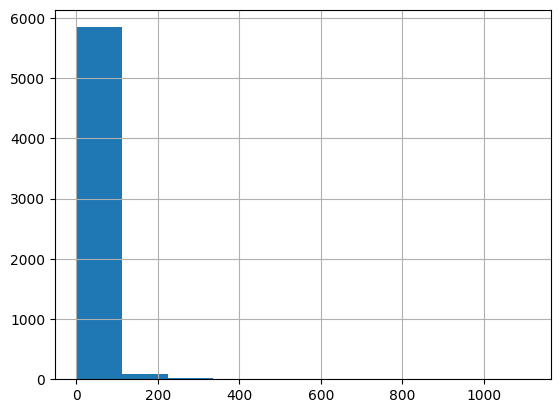

In [23]:
coms_df[coms_df.score>2].score.hist()

array([[<Axes: title={'center': 'comment'}>,
        <Axes: title={'center': 'comment_reply'}>],
       [<Axes: title={'center': 'submission'}>, <Axes: >]], dtype=object)

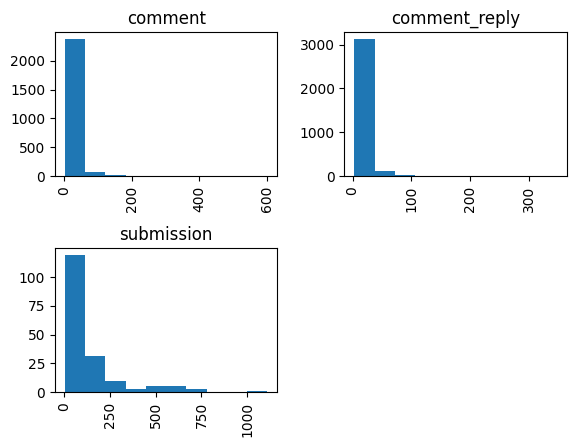

In [24]:
coms_df[coms_df.score>2].score.hist(by=coms_df['type'])

array([<Axes: title={'center': 'comment'}, xlabel='created_date'>,
       <Axes: title={'center': 'comment_reply'}, xlabel='created_date'>,
       <Axes: title={'center': 'submission'}, xlabel='created_date'>],
      dtype=object)

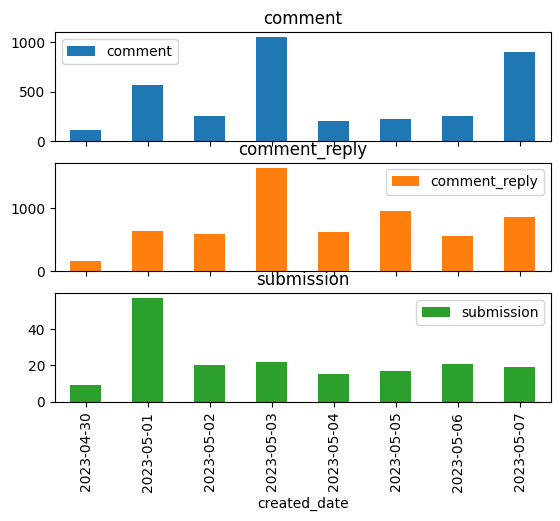

In [25]:
coms_df \
    .groupby([pd.to_datetime(coms_df.created_date).dt.date,'type']).count()['id'].reset_index() \
    .pivot(index='created_date', columns='type', values='id') \
    .plot.bar(subplots=True)

array([<Axes: title={'center': 'comment'}, xlabel='created_date'>,
       <Axes: title={'center': 'comment_reply'}, xlabel='created_date'>,
       <Axes: title={'center': 'submission'}, xlabel='created_date'>],
      dtype=object)

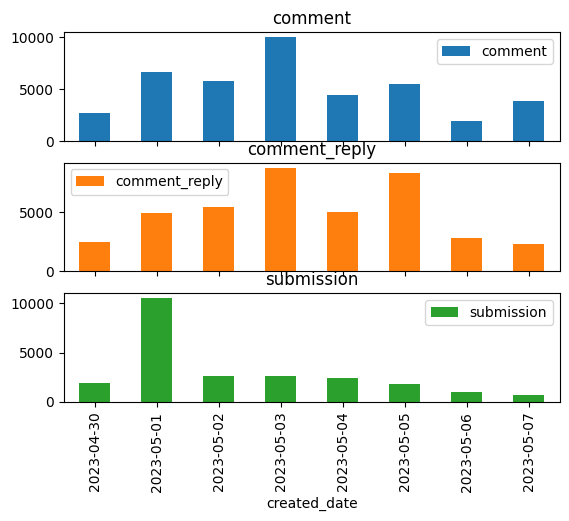

In [26]:
coms_df \
    .groupby([pd.to_datetime(coms_df.created_date).dt.date,'type']).sum()['score'].reset_index() \
    .pivot(index='created_date', columns='type', values='score') \
    .plot.bar(subplots=True)

In [27]:
coms_df[coms_df.controversiality !=0].head()

,subreddit,submission_text,created_utc,controversiality,submission_id,score,likes,distinguished,downs,title,author,upvote_ratio,url_domain,permalink,retrieve_time,created_date,parent_id,type,gilded,url,body,num_reports,total_awards_received,id,score_percent
0,MLS,NaN,1.682946e+09,NaN,134ls7m,1109,NaN,NaN,NaN,[meme] It would end the pain,Fraganade,0.98,i.imgur.com,/r/MLS/comments/134ls7m/meme_it_would_end_the_...,2023-05-06 23:17:30,2023-05-01 12:57:25,NaN,submission,NaN,https://i.imgur.com/duojFS6.jpg,NaN,NaN,NaN,134ls7m,0.010596
38,MLS,NaN,1.682962e+09,NaN,134u5dj,760,NaN,NaN,NaN,[MEME] The regular season's all that matters.....,MkPapadopoulos,0.98,i.redd.it,/r/MLS/comments/134u5dj/meme_the_regular_seaso...,2023-05-06 23:17:31,2023-05-01 17:22:37,NaN,submission,NaN,https://i.redd.it/1nnrsv0g79xa1.jpg,NaN,NaN,NaN,134u5dj,0.007262
75,MLS,NaN,1.682968e+09,1.0,134u5dj,2,NaN,NaN,0.0,NaN,Scratchbuttdontsniff,NaN,NaN,/r/MLS/comments/134u5dj/meme_the_regular_seaso...,2023-05-06 23:17:31,2023-05-01 19:01:33,t1_jigsnra,comment_reply,0.0,NaN,Not for me... I am Chiefs fan... But 2019 does...,NaN,0.0,jigsy4k,0.000019
83,MLS,NaN,1.682830e+09,NaN,133fwvu,755,NaN,NaN,NaN,Portland Thorns [3] - 3 Angel City - Bella Bix...,TheMonkeyPrince,0.96,v.redd.it,/r/MLS/comments/133fwvu/portland_thorns_3_3_an...,2023-05-06 23:17:31,2023-04-30 04:39:40,NaN,submission,NaN,https://v.redd.it/mhsecsiraywa1,NaN,NaN,NaN,133fwvu,0.007214
107,MLS,NaN,1.682873e+09,1.0,133fwvu,-2,NaN,NaN,0.0,NaN,outdoorman92,NaN,NaN,/r/MLS/comments/133fwvu/portland_thorns_3_3_an...,2023-05-06 23:17:31,2023-04-30 16:35:44,t3_133fwvu,comment,0.0,NaN,Why is the Portland keeper on that end of the ...,NaN,0.0,jibmk2j,-0.000019


In [28]:
coms_df.groupby('retrieve_time').count().head()['id']


retrieve_time
2023-05-06 23:17:30     38
2023-05-06 23:17:31    201
2023-05-06 23:17:32    143
2023-05-06 23:17:33    142
2023-05-06 23:17:34    522
Name: id, dtype: int64